MNIST

In [0]:
import tensorflow as tf
from tensorflow.examples.tutorials.mnist import input_data


mnist = input_data.read_data_sets("MNIST_data/", one_hot = True)

nb_classes = 10

x = tf.placeholder(tf.float32,[None,784])
y = tf.placeholder(tf.float32, [None, nb_classes])

w = tf.Variable(tf.random_normal([784, nb_classes]))
b = tf.Variable(tf.random_normal([nb_classes]))

hypothesis = tf.nn.softmax(tf.matmul(x,w)+b)
cost = tf.reduce_mean(-tf.reduce_sum(y * tf.log(hypothesis), axis=1))
optimizer = tf.train.GradientDescentOptimizer(learning_rate = 0.1).minimize(cost)

is_correct = tf.equal(tf.arg_max(hypothesis,1),tf.arg_max(y,1))
accuracy = tf.reduce_mean(tf.cast(is_correct,tf.float32))

training_epochs = 15
batch_size = 100

with tf.Session() as sess:
  sess.run(tf.global_variables_initializer())
  for epoch in range(training_epochs):
    avg_cost = 0
    total_batch = int(mnist.train.num_examples / batch_size)

    for i in range(total_batch):
      batch_xs, batch_ys = mnist.train.next_batch(batch_size)
      c, _ = sess.run([cost, optimizer], feed_dict = {x:batch_xs, y: batch_ys})
      avg_cost += c / total_batch
    print('Epoch:','%04d' % (epoch+1), 'cost =', '{:.9f}'.format(avg_cost))
  print("Accuracy: ", accuracy.eval(session=sess, feed_dict={x:mnist.test.images,y:mnist.test.labels}))


Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
Epoch: 0001 cost = 2.888433115
Epoch: 0002 cost = 1.066092257
Epoch: 0003 cost = 0.840590140
Epoch: 0004 cost = 0.734623680
Epoch: 0005 cost = 0.668669992
Epoch: 0006 cost = 0.623026057
Epoch: 0007 cost = 0.588880965
Epoch: 0008 cost = 0.562164516
Epoch: 0009 cost = 0.540056424
Epoch: 0010 cost = 0.521913114
Epoch: 0011 cost = 0.505899966
Epoch: 0012 cost = 0.492199535
Epoch: 0013 cost = 0.480230956
Epoch: 0014 cost = 0.469070841
Epoch: 0015 cost = 0.459342113
Accuracy:  0.8902


With sample image show and prediction

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
Epoch: 0001 cost = 2.931330703
Epoch: 0002 cost = 1.133081497
Epoch: 0003 cost = 0.907324286
Epoch: 0004 cost = 0.792636541
Epoch: 0005 cost = 0.719323390
Epoch: 0006 cost = 0.666900329
Epoch: 0007 cost = 0.627150749
Epoch: 0008 cost = 0.595577061
Epoch: 0009 cost = 0.569531253
Epoch: 0010 cost = 0.547577710
Epoch: 0011 cost = 0.528747611
Epoch: 0012 cost = 0.513057485
Epoch: 0013 cost = 0.498389002
Epoch: 0014 cost = 0.485932419
Epoch: 0015 cost = 0.474754998
Accuracy:  0.8873
Label1: [7]
Prediction: [7]


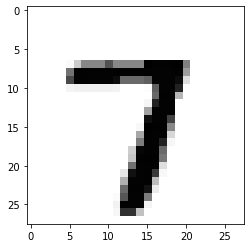

In [0]:
import tensorflow as tf
from tensorflow.examples.tutorials.mnist import input_data
import matplotlib.pyplot as plt
import random

mnist = input_data.read_data_sets("MNIST_data/", one_hot = True)

nb_classes = 10

x = tf.placeholder(tf.float32,[None,784])
y = tf.placeholder(tf.float32, [None, nb_classes])

w = tf.Variable(tf.random_normal([784, nb_classes]))
b = tf.Variable(tf.random_normal([nb_classes]))

hypothesis = tf.nn.softmax(tf.matmul(x,w)+b)
cost = tf.reduce_mean(-tf.reduce_sum(y * tf.log(hypothesis), axis=1))
optimizer = tf.train.GradientDescentOptimizer(learning_rate = 0.1).minimize(cost)

is_correct = tf.equal(tf.arg_max(hypothesis,1),tf.arg_max(y,1))
accuracy = tf.reduce_mean(tf.cast(is_correct,tf.float32))

training_epochs = 15
batch_size = 100

with tf.Session() as sess:
  sess.run(tf.global_variables_initializer())
  for epoch in range(training_epochs):
    avg_cost = 0
    total_batch = int(mnist.train.num_examples / batch_size)

    for i in range(total_batch):
      batch_xs, batch_ys = mnist.train.next_batch(batch_size)
      c, _ = sess.run([cost, optimizer], feed_dict = {x:batch_xs, y: batch_ys})
      avg_cost += c / total_batch
    print('Epoch:','%04d' % (epoch+1), 'cost =', '{:.9f}'.format(avg_cost))
  print("Accuracy: ", accuracy.eval(session=sess, feed_dict={x:mnist.test.images,y:mnist.test.labels}))
  r = random.randint(0, mnist.test.num_examples -1)
  print("Label1:", sess.run(tf.argmax(mnist.test.labels[r:r+1],1)))
  print("Prediction:", sess.run(tf.argmax(hypothesis, 1), feed_dict={x:mnist.test.images[r:r+1]}))

  plt.imshow(mnist.test.images[r:r+1].reshape(28,28), cmap='Greys', interpolation='nearest')
  plt.show()